### Data Preprocessing

In [1]:
import pandas as pd
import tensorflow as tf
import codecs
import numpy as np
import math
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score, precision_score # New
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import keras
import matplotlib.pyplot as plt
import keras.preprocessing
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.engine import Layer
from keras.layers import merge
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Flatten, Add, Multiply
from keras import backend as K
from keras.layers import Activation, BatchNormalization
# regularizers
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
from keras.layers import LSTM, Bidirectional
from keras.utils import plot_model
from keras.layers import Dropout
from scipy import signal
import openpyxl

data_path_2011 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2011_smd_hourly.xls'
data_source_2011 = pd.read_excel(data_path_2011, sheet_name='ISONE CA')
data_source_2011 = pd.DataFrame(data_source_2011)
data_set_2011 = data_source_2011.iloc[:, -4:-1]
data_set_2011 = np.array(data_set_2011)

data_path_2012 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2012_smd_hourly.xls'
data_source_2012 = pd.read_excel(data_path_2012, sheet_name='ISONE CA')
data_source_2012 = pd.DataFrame(data_source_2012)
data_set_2012a = np.array(data_source_2012.iloc[:1416, -4:-1])
data_set_2012b = np.array(data_source_2012.iloc[1440:, -4:-1])
data_set_2012 = np.vstack([data_set_2012a, data_set_2012b])
data_set_2012 = np.array(data_set_2012)

data_path_2013 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2013_smd_hourly.xls'
data_source_2013 = pd.read_excel(data_path_2013, sheet_name='ISONE CA')
data_source_2013 = pd.DataFrame(data_source_2013)
data_set_2013 = data_source_2013.iloc[:, -4:-1]
data_set_2013 = np.array(data_set_2013)

data_path_2014 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2014_smd_hourly.xls'
data_source_2014 = pd.read_excel(data_path_2014, sheet_name='ISONE CA')
data_source_2014 = pd.DataFrame(data_source_2014)
data_set_2014 = data_source_2014.iloc[:, -4:-1]
data_set_2014 = np.array(data_set_2014)

data_path_2015 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2015_smd_hourly.xls'
data_source_2015 = pd.read_excel(data_path_2015, sheet_name='ISONE CA')
data_source_2015 = pd.DataFrame(data_source_2015)
data_set_2015 = data_source_2015.iloc[:, -4:-1]
data_set_2015 = np.array(data_set_2015)

data_path_2016 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2016_smd_hourly.xls'
data_source_2016 = pd.read_excel(data_path_2016, sheet_name='ISO NE CA')
data_source_2016 = pd.DataFrame(data_source_2016)
data_set_2016a = np.array(data_source_2016.iloc[:1416, -5:-2])
data_set_2016b = np.array(data_source_2016.iloc[1440:, -5:-2])
data_set_2016 = np.vstack([data_set_2016a, data_set_2016b])
data_set_2016 = np.array(data_set_2016)

data_path_2017 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2017_smd_hourly.xlsx'
data_source_2017 = pd.read_excel(data_path_2017, sheet_name='ISO NE CA')
data_source_2017 = pd.DataFrame(data_source_2017)
data_set_2017 = data_source_2017.iloc[:, -9:-6]
data_set_2017 = np.array(data_set_2017)

data_path_2018 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2018_smd_hourly.xlsx'
data_source_2018 = pd.read_excel(data_path_2018, sheet_name='ISO NE CA')
data_source_2018 = pd.DataFrame(data_source_2018)
data_set_2018 = data_source_2018.iloc[:, -9:-6]
data_set_2018 = np.array(data_set_2018)

data_path_2019 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2019_smd_hourly.xlsx'
data_source_2019 = pd.read_excel(data_path_2019, sheet_name='ISO NE CA')
data_source_2019 = pd.DataFrame(data_source_2019)
data_set_2019 = data_source_2019.iloc[:, -9:-6]
data_set_2019 = np.array(data_set_2019)

load = np.vstack([data_set_2011, data_set_2012, data_set_2013, data_set_2014, data_set_2015, data_set_2016, data_set_2017, data_set_2018, data_set_2019])
print(data_set_2011.shape)
print(data_set_2012.shape)
print(data_set_2013.shape)
print(data_set_2014.shape)
print(data_set_2015.shape)
print(data_set_2016.shape)
print(data_set_2017.shape)
print(data_set_2018.shape)
print(data_set_2019.shape)
print(load.shape)

Using TensorFlow backend.


(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(78840, 3)


In [2]:
pv_path_2011 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2011.xlsx'
pv_source_2011 = pd.read_excel(pv_path_2011, sheet_name='HourlyData')
pv_source_2011 = pd.DataFrame(pv_source_2011)
pv_set_2011 = pv_source_2011.iloc[:, 3]
pv_set_2011 = pv_set_2011.fillna(0)
pv_set_2011 = np.array(pv_set_2011)
pv_set_2011 = pv_set_2011.reshape(-1,1)

pv_path_2012 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2012.xlsx'
pv_source_2012 = pd.read_excel(pv_path_2012, sheet_name='HourlyData')
pv_source_2012 = pd.DataFrame(pv_source_2012)
pv_source_2012 = pv_source_2012.fillna(0)
pv_set_2012a = np.array(pv_source_2012.iloc[:1416, 3])
pv_set_2012b = np.array(pv_source_2012.iloc[1440:, 3])
pv_set_2012 = np.concatenate((pv_set_2012a, pv_set_2012b), axis=None)
pv_set_2012 = np.array(pv_set_2012)
pv_set_2012 = pv_set_2012.reshape(-1,1)

pv_path_2013 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2013.xlsx'
pv_source_2013 = pd.read_excel(pv_path_2013, sheet_name='HourlyData')
pv_source_2013 = pd.DataFrame(pv_source_2013)
pv_set_2013 = pv_source_2013.iloc[:, 3]
pv_set_2013 = pv_set_2013.fillna(0)
pv_set_2013 = np.array(pv_set_2013)
pv_set_2013 = pv_set_2013.reshape(-1,1)

pv_path_2014 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2014.xlsx'
pv_source_2014 = pd.read_excel(pv_path_2014, sheet_name='HourlyData')
pv_source_2014 = pd.DataFrame(pv_source_2014)
pv_set_2014 = pv_source_2014.iloc[:, 3]
pv_set_2014 = pv_set_2014.fillna(0)
pv_set_2014 = np.array(pv_set_2014)
pv_set_2014 = pv_set_2014.reshape(-1,1)

pv_path_2015 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2015.xlsx'
pv_source_2015 = pd.read_excel(pv_path_2015, sheet_name='HourlyData')
pv_source_2015 = pd.DataFrame(pv_source_2015)
pv_set_2015 = pv_source_2015.iloc[:, 3]
pv_set_2015 = pv_set_2015.fillna(0)
pv_set_2015 = np.array(pv_set_2015)
pv_set_2015 = pv_set_2015.reshape(-1,1)

pv_path_2016 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2016.xlsx'
pv_source_2016 = pd.read_excel(pv_path_2016, sheet_name='HourlyData')
pv_source_2016 = pd.DataFrame(pv_source_2016)
pv_source_2016 = pv_source_2016.fillna(0)
pv_set_2016a = np.array(pv_source_2016.iloc[:1416, 3])
pv_set_2016b = np.array(pv_source_2016.iloc[1440:, 3])
pv_set_2016 = np.concatenate((pv_set_2016a, pv_set_2016b), axis=None)
pv_set_2016 = np.array(pv_set_2016)
pv_set_2016 = pv_set_2016.reshape(-1,1)

pv_path_2017 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2017.xlsx'
pv_source_2017 = pd.read_excel(pv_path_2017, sheet_name='HourlyData')
pv_source_2017 = pd.DataFrame(pv_source_2017)
pv_set_2017 = pv_source_2017.iloc[:, 3]
pv_set_2017 = pv_set_2017.fillna(0)
pv_set_2017 = np.array(pv_set_2017)
pv_set_2017 = pv_set_2017.reshape(-1,1)

pv_path_2018 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2018.xlsx'
pv_source_2018 = pd.read_excel(pv_path_2018, sheet_name='HourlyData')
pv_source_2018 = pd.DataFrame(pv_source_2018)
pv_set_2018 = pv_source_2018.iloc[:, 3]
pv_set_2018 = pv_set_2018.fillna(0)
pv_set_2018 = np.array(pv_set_2018)
pv_set_2018 = pv_set_2018.reshape(-1,1)

pv_path_2019 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2019.xlsx'
pv_source_2019 = pd.read_excel(pv_path_2019, sheet_name='HourlyData')
pv_source_2019 = pd.DataFrame(pv_source_2019)
pv_set_2019 = pv_source_2019.iloc[:, 3]
pv_set_2019 = pv_set_2019.fillna(0)
pv_set_2019 = np.array(pv_set_2019)
pv_set_2019 = pv_set_2019.reshape(-1,1)

pv = np.concatenate((pv_set_2011, pv_set_2012, pv_set_2013, pv_set_2014, pv_set_2015, pv_set_2016, pv_set_2017, pv_set_2018, pv_set_2019), axis=None)
pv = pv.reshape(-1,1)
print(pv.shape)

(78840, 1)


In [3]:
weather_path_2011 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2011.csv'
weather_source_2011 = pd.read_csv(weather_path_2011)
weather_source_2011 = pd.DataFrame(weather_source_2011)
weather_set_2011 = weather_source_2011.iloc[2:, 5:16]
weather_set_2011 = np.array(weather_set_2011, dtype='float')

weather_path_2012 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2012.csv'
weather_source_2012 = pd.read_csv(weather_path_2012)
weather_source_2012 = pd.DataFrame(weather_source_2012)
weather_set_2012 = weather_source_2012.iloc[2:, 5:16]
weather_set_2012 = np.array(weather_set_2012, dtype='float')

weather_path_2013 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2013.csv'
weather_source_2013 = pd.read_csv(weather_path_2013)
weather_source_2013 = pd.DataFrame(weather_source_2013)
weather_set_2013 = weather_source_2013.iloc[2:, 5:16]
weather_set_2013 = np.array(weather_set_2013, dtype='float')

weather_path_2014 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2014.csv'
weather_source_2014 = pd.read_csv(weather_path_2014)
weather_source_2014 = pd.DataFrame(weather_source_2014)
weather_set_2014 = weather_source_2014.iloc[2:, 5:16]
weather_set_2014 = np.array(weather_set_2014, dtype='float')

weather_path_2015 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2015.csv'
weather_source_2015 = pd.read_csv(weather_path_2015)
weather_source_2015 = pd.DataFrame(weather_source_2015)
weather_set_2015 = weather_source_2015.iloc[2:, 5:16]
weather_set_2015 = np.array(weather_set_2015, dtype='float')

weather_path_2016 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2016.csv'
weather_source_2016 = pd.read_csv(weather_path_2016)
weather_source_2016 = pd.DataFrame(weather_source_2016)
weather_set_2016 = weather_source_2016.iloc[2:, 5:16]
weather_set_2016 = np.array(weather_set_2016, dtype='float')

weather_path_2017 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2017.csv'
weather_source_2017 = pd.read_csv(weather_path_2017)
weather_source_2017 = pd.DataFrame(weather_source_2017)
weather_set_2017 = weather_source_2017.iloc[2:, 5:16]
weather_set_2017 = np.array(weather_set_2017, dtype='float')

weather_path_2018 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2018.csv'
weather_source_2018 = pd.read_csv(weather_path_2018)
weather_source_2018 = pd.DataFrame(weather_source_2018)
weather_set_2018 = weather_source_2018.iloc[2:, 5:16]
weather_set_2018 = np.array(weather_set_2018, dtype='float')

weather_path_2019 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2019.csv'
weather_source_2019 = pd.read_csv(weather_path_2019)
weather_source_2019 = pd.DataFrame(weather_source_2019)
weather_set_2019 = weather_source_2019.iloc[2:, 5:16]
weather_set_2019 = np.array(weather_set_2019, dtype='float')

weather = np.vstack((weather_set_2011, weather_set_2012, weather_set_2013, weather_set_2014, weather_set_2015, weather_set_2016, weather_set_2017, weather_set_2018, weather_set_2019))
print(weather_set_2011.shape)
print(weather_set_2012.shape)
print(weather_set_2013.shape)
print(weather_set_2014.shape)
print(weather_set_2015.shape)
print(weather_set_2016.shape)
print(weather_set_2017.shape)
print(weather_set_2018.shape)
print(weather_set_2019.shape)
print(weather.shape)

C:\Users\Smartgrid_ML\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(157680, 11)


In [4]:
weather_dat = np.zeros(shape=(78840,11))
print(weather[0,:])
print(weather[1,:])
print(weather[2,:])
print(weather[3,:])
for i in range(78840):
    weather_dat[i,:] = np.add(weather[2*i,:],weather[2*i+1,:])
weather_dat = np.true_divide(weather_dat,2)
print(weather_dat)
print(weather_dat.shape)

[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.6058e+02 8.6600e-01 1.0000e-01 1.0000e+02]
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.5896e+02 8.6600e-01 1.0000e-01 1.0000e+02]
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.5579e+02 8.6600e-01 1.0000e-01 1.0000e+02]
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.5161e+02 8.6600e-01 1.0000e-01 1.0000e+02]
[[  0.      0.      0.    ...   0.866   0.1   100.   ]
 [  0.      0.      0.    ...   0.866   0.1   100.   ]
 [  0.      0.      0.    ...   0.866   0.1   100.   ]
 ...
 [  0.      0.      0.    ...   0.11    0.4    97.18 ]
 [  0.      0.      0.    ...   0.11    0.4    96.97 ]
 [  0.      0.      0.    ...   0.11    0.4    97.225]]
(78840, 11)


In [5]:
dataall = np.hstack([load, pv, weather_dat])
index=['Dry bulb F','Dew Point F', 'System Load', 'Measured PV','DHI','DNI','GHI','CS_DHI','CS_DNI','CS_GHI','DP_C','SZ Angle','Surf Albedo','Wind Speed', 'Rel. Humidity']
dataall = np.vstack([index, dataall])
print(dataall.shape)
df = pd.DataFrame(dataall[1:,:], columns=dataall[0,:])
df.head()

(78841, 15)


,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity
0,36.0,29.0,12214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159.77,0.866,0.1,100.0
1,36.0,29.0,11573.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.7,0.866,0.1,100.0
2,35.0,29.0,11114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.23000000000002,0.866,0.1,100.0
3,35.0,30.0,10863.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.525,0.866,0.1,100.0
4,36.0,31.0,10827.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.47500000000001,0.866,0.1,100.0


In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
norm_df = pd.DataFrame(min_max_scaler.fit_transform(df), 
                             columns=df.columns, 
                             index=df.index)
norm_df.head()

,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity
0,0.423423,0.54,0.218118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.998572,0.994825,0.05,1.0
1,0.423423,0.54,0.185768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.955240,0.994825,0.05,1.0
2,0.414414,0.54,0.162604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.887636,0.994825,0.05,1.0
3,0.414414,0.55,0.149937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.811215,0.994825,0.05,1.0
4,0.423423,0.56,0.148120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.732332,0.994825,0.05,1.0


### Correlation Analysis

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
norm_df = pd.DataFrame(min_max_scaler.fit_transform(df), 
                             columns=df.columns, 
                             index=df.index)
norm_df.head()

,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity
0,0.423423,0.54,0.218118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.998572,0.994825,0.05,1.0
1,0.423423,0.54,0.185768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.955240,0.994825,0.05,1.0
2,0.414414,0.54,0.162604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.887636,0.994825,0.05,1.0
3,0.414414,0.55,0.149937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.811215,0.994825,0.05,1.0
4,0.423423,0.56,0.148120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.732332,0.994825,0.05,1.0


Saving heatmap


C:\Users\Smartgrid_ML\Documents\KMS\btm_data\keijzer.py:70: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 432x288 with 0 Axes>

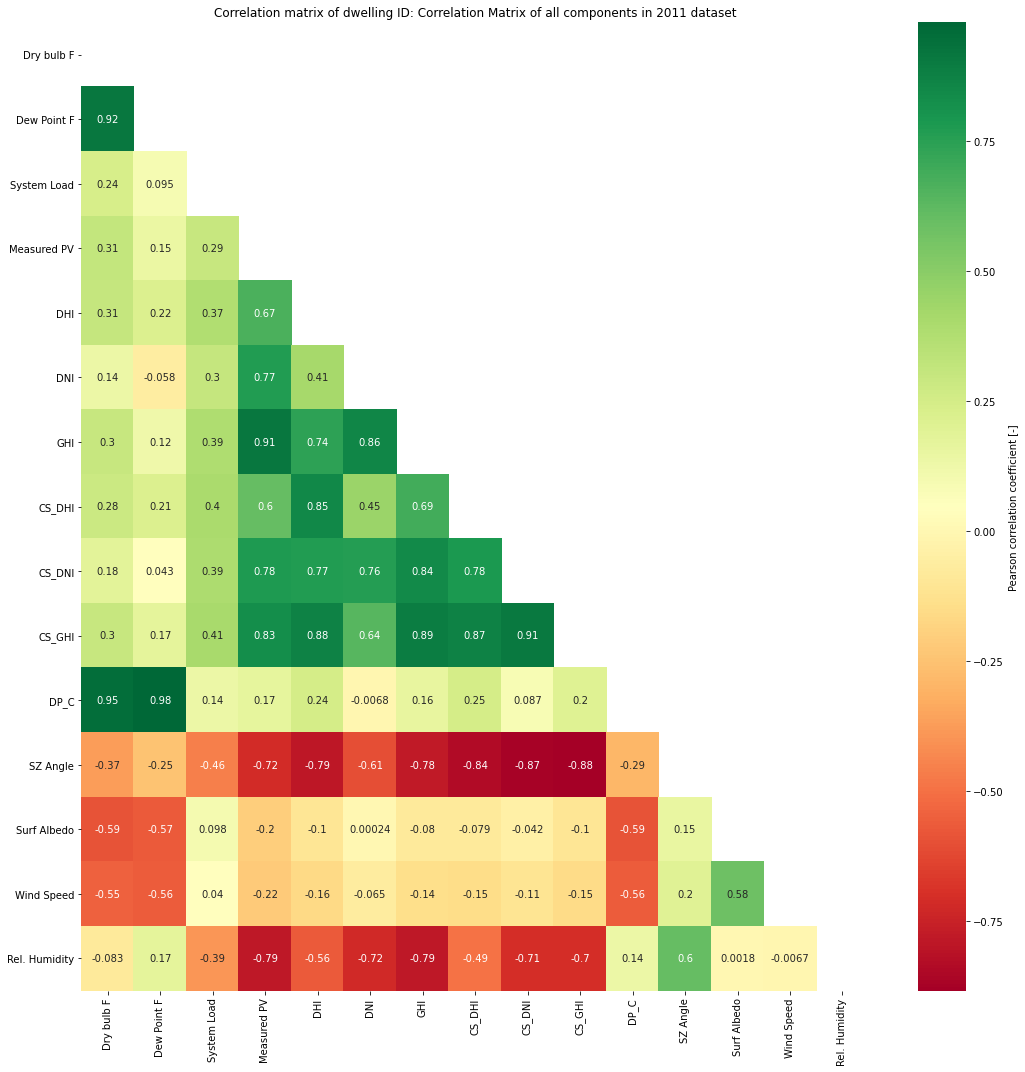

In [8]:
import seaborn as sns
from keijzer import *
df2011 = norm_df.iloc[:8760,:]
df2019 = norm_df.iloc[-8760:,:]

# sns.heatmap(data = df2011.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
fig = create_corr_matrix(df2011, 'Correlation Matrix of all components in 2011 dataset', True, size=(15,15))

#fig.savefig(title+'corr_mat_TRAIN.png')

Saving heatmap


<Figure size 432x288 with 0 Axes>

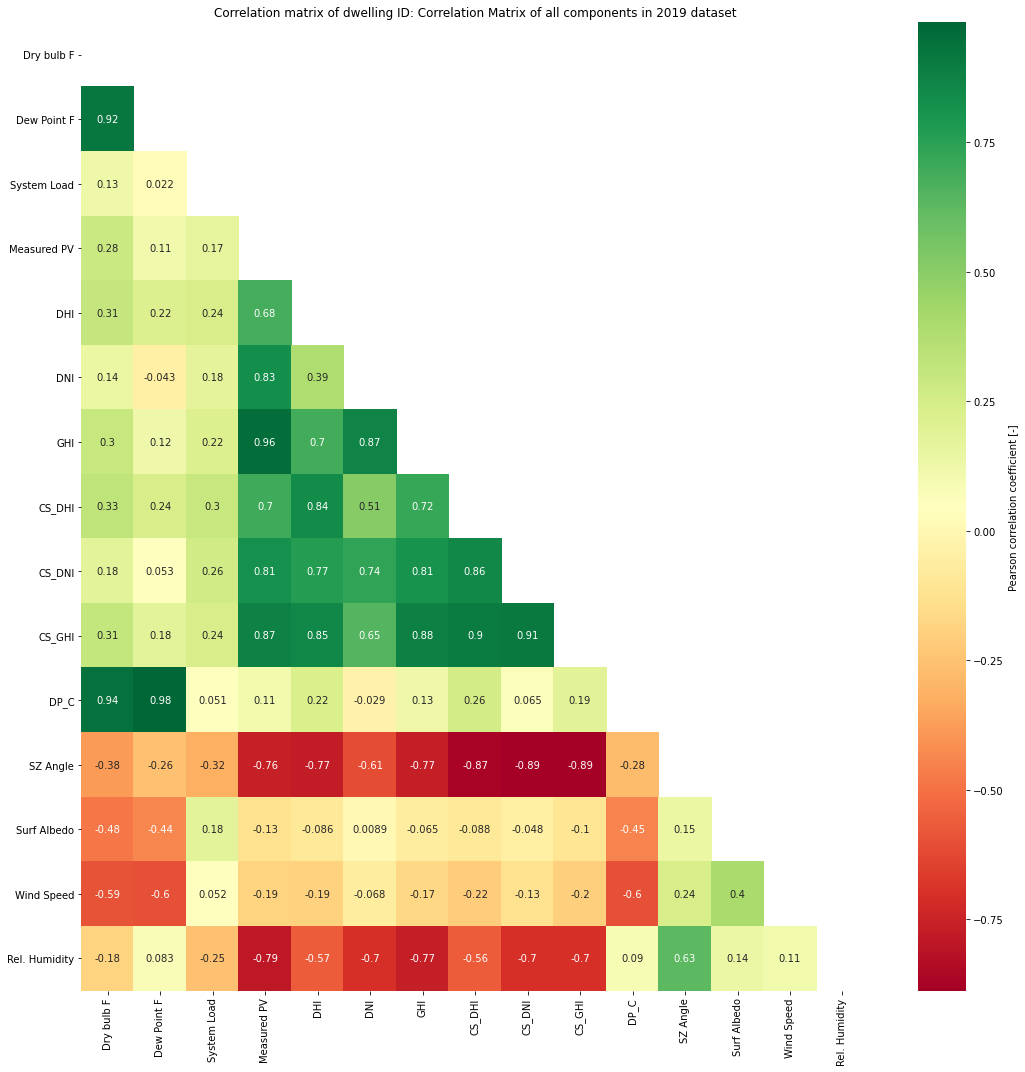

In [9]:
#plt.figure(figsize=(15,15))
#sns.heatmap(data = df2019.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
fig = create_corr_matrix(df2019, 'Correlation Matrix of all components in 2019 dataset', True, size=(15,15))

Saving heatmap


<Figure size 432x288 with 0 Axes>

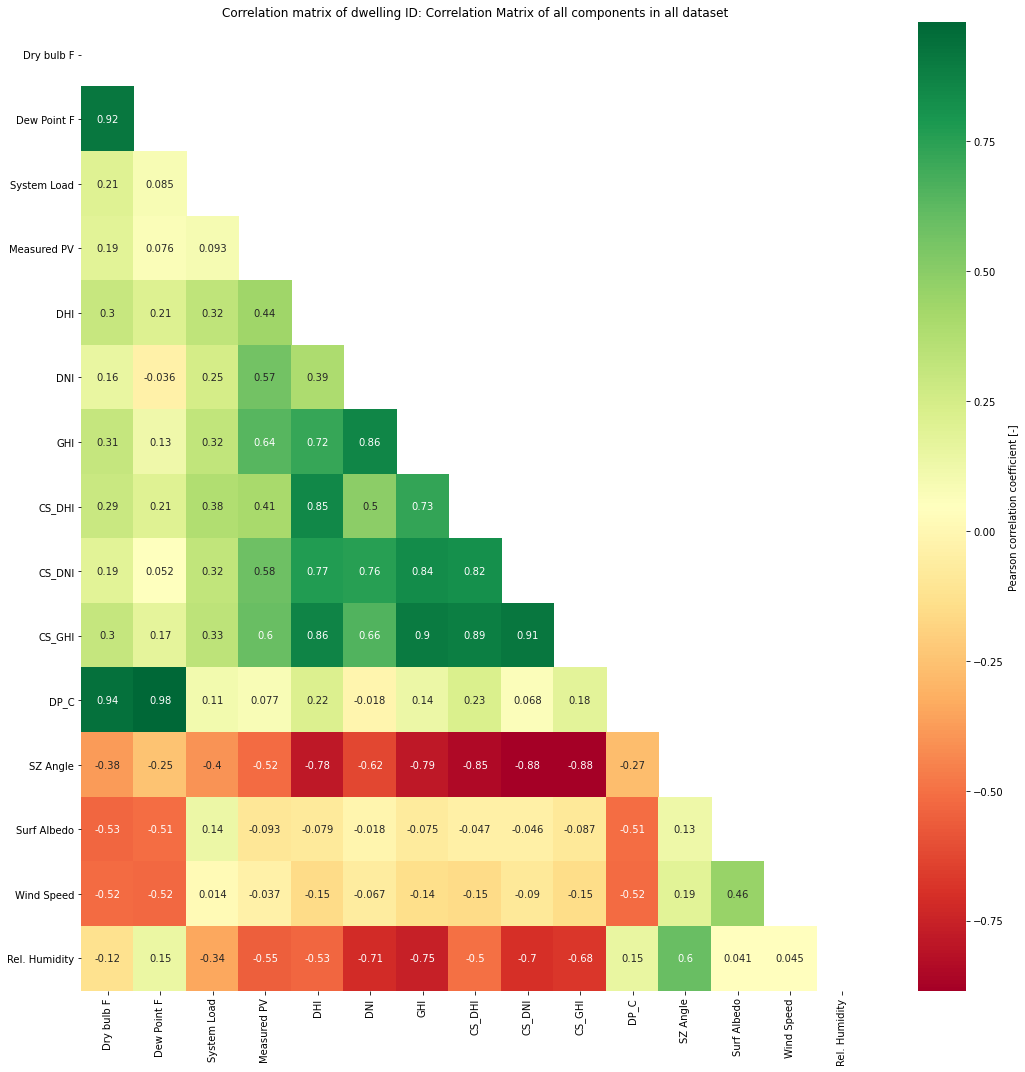

In [10]:
#norm_df.corr()
#plt.figure(figsize=(15,15))
#sns.heatmap(data = norm_df.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
fig = create_corr_matrix(norm_df, 'Correlation Matrix of all components in all dataset', True, size=(15,15))

### Deep Learning Model

In [11]:
print(norm_df.shape)
norm_df = np.array(norm_df)
def create_dataset(dataset, timesteps):
    dataX, dataY = [], []
    for i in range(len(dataset) - timesteps - 1):
        a = dataset[i:(i + timesteps), :]
        dataX.append(a)
        dataY.append(dataset[i + timesteps, :])
    return np.array(dataX), np.array(dataY)

class LossHistory(keras.callbacks.Callback):  # history = LossHistory()
    def init(self):  # history.init()
        self.losses = []
        # self.accs = []
        self.val_losses = []
        # self.val_accs = []
        self.mses = []
        self.maes = []
        self.mapes = []
        self.val_mses = []
        self.val_maes = []
        self.val_mapes = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        # self.accs.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        # self.val_accs.append(logs.get('val_accuracy
        self.mses.append(logs.get('mean_squared_error'))
        self.maes.append(logs.get('mean_absolute_error'))
        self.mapes.append(logs.get('mean_absolute_percentage_error'))
        self.val_mses.append(logs.get('val_mean_squared_error'))
        self.val_maes.append(logs.get('val_mean_absolute_error'))
        self.val_mapes.append(logs.get('val_mean_absolute_percentage_error'))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

(78840, 15)


In [12]:
X, Y = create_dataset(norm_df, 24)

trX = X[:47286, :, :]
vaX = X[47286:55170, :, :]
teX = X[55170:, :, :]
trY = Y[:47286, 2]
vaY = Y[47286:55170,2]
teY = Y[55170:, 2]

print(trX.shape)
print(trY.shape)
print(teX.shape)

(47286, 24, 15)
(47286,)
(23645, 24, 15)


In [13]:
from keras.models import Model
from keras.layers import *
from keras.optimizers import Adam,SGD
from keras.backend import clear_session
import tensorflow.keras.backend as K
import tensorflow as tf
from keras.models import Sequential, Model 
from keras.layers import Dense, Input, Flatten, Add, concatenate, Dropout
from keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D  
from keras.layers.convolutional import Conv1D, AveragePooling1D, MaxPooling1D
from keras.utils import plot_model

In [14]:
def WaveNetResidualConv1D(num_filters, kernel_size, stacked_layer):
    def build_residual_block(l_input):
        resid_input = l_input
        for dilation_rate in [2**i for i in range(stacked_layer)]:
            l_sigmoid_conv1d = Conv1D(num_filters, kernel_size, dilation_rate=dilation_rate, padding="same", activation="sigmoid")(l_input)
            l_tanh_conv1d    = Conv1D(num_filters, kernel_size, dilation_rate=dilation_rate, padding="same", activation="mish")(l_input)
            l_input          = Multiply()([l_sigmoid_conv1d, l_tanh_conv1d])
            l_input          = Conv1D(num_filters, 1, padding="same")(l_input)
            resid_input = Add()([resid_input ,l_input])
        return resid_input
    return build_residual_block

In [15]:
# WaveNet

num_filters = 128
kernel_size = 2
d_rates = [2**i for i in range(12)]

visible1 = Input(shape=(24, 15))    # 타임스텝 24, 피처 15

x = visible1
for d_rate in d_rates:
    x = Conv1D(filters=num_filters, kernel_size=kernel_size, padding='causal', activation='relu', dilation_rate=d_rate)(x)
x = Flatten()(x)
x = Dense(64, activation="relu")(x)
x = Dropout(.8)(x)
x = Dense(24)(x)
output = Dense(1)(x)

model = Model(inputs=[visible1], outputs=[output]) # from keras.models import Model

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 24, 15)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 24, 128)           3968      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 24, 128)           32896     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 24, 128)           32896     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 24, 128)           32896     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 24, 128)           32896     
____________________________________________

In [16]:
from keras.models import Sequential, Model 
from keras.layers import Dense, Input, Flatten, Add, concatenate, Dropout
from keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D  
from keras.layers.convolutional import Conv1D, AveragePooling1D, MaxPooling1D
from keras.utils import plot_model

visible1 = Input(shape=(24, 15))    # 타임스텝 100, 피처 25, 21+4 

# visible2 = Input(shape=(sequence_length, nb_features))    # 타임스텝 100, 피처 25, 21+4 

d1 = Conv1D(filters=512, kernel_size=2, padding='causal', activation='relu',  
            dilation_rate=1)(visible1)  # 2x1=2,  x4  

d1 = Conv1D(filters=15, kernel_size=2, padding='causal', activation='relu',  
            dilation_rate=4)(d1)        # 2x4=8,  x4   

res01 = keras.layers.Add()([d1, visible1])   # (100, 25) (100, 25)
# ===== 2L 

d1 = Conv1D(filters=512, kernel_size=2, padding='causal', activation='relu',  
            dilation_rate=16)(res01)     # 2x16=32,  x4  

d1 = Conv1D(filters=15, kernel_size=4, padding='causal', activation='relu',  
            dilation_rate=32)(d1)        # 4x32= 128 

res02 = keras.layers.Add()([d1, res01])   # (100, 25) (100, 25)
# ===== 4L 

d1 = Conv1D(filters=512, kernel_size=4, padding='causal', activation='relu',  
            dilation_rate=16)(res02)    # 4x16= 64    ####### shrink layer

d1 = Conv1D(filters=15, kernel_size=8, padding='causal', activation='relu',  
            dilation_rate=4)(d1)        # 8x4= 32     ####### shrink layer

res03 = keras.layers.Add()([d1, res02])   # (100, 25) (100, 25)  # res03 --------------------------
# ===== 6L 

# below 4Layers 
#------------------------------------------------------

#out = Conv1D(1024, 1, padding='same', activation='elu')(res03)   # --------------------  
out = Conv1D(512, 1, padding='same', activation='relu')(res03)   # --------------------  
out = Dropout(0.2)(out)   

#out = Conv1D(512, 1, padding='same', activation='elu')(out) # 1 is 1x1 conv, same is normal conv.  
out = Conv1D(256, 1, padding='same', activation='relu')(out) # 1 is 1x1 conv, same is normal conv.  
out = Dropout(0.2)(out)  

#out = AveragePooling1D(pool_size=2, strides=2, padding='same')(out) # pool_size=2, strides=1
out = GlobalAveragePooling1D()(out) # pool_size=2, strides=1
# GlobalAveragePooling1D, GlobalMaxPooling1D  > AveragePooling1D, MaxPooling1D

out = Dense(1)(out) # Dense(1, ), nb_out = 1, # 마지막 아웃 풋에 액티베이션 펑션을 제거. 

# https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf
# ---------------------------------------------------------------------

#model = Model(inputs=visible1, outputs=[out]) # from keras.models import Model
#model = Model(inputs=[visible1, visible2], outputs=[out]) # from keras.models import Model

model = Model(inputs=[visible1], outputs=[out]) # from keras.models import Model

In [17]:
from keras import losses
from keras.losses import binary_crossentropy, categorical_crossentropy, sparse_categorical_crossentropy

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape'])
early_stopping =EarlyStopping(monitor='val_loss', patience=100)  # 10 -> 20 -> 4
batch_size = 100
epochs = 1000

history = LossHistory()
history.init()

model.fit(trX, trY, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaX, vaY), callbacks=[history, early_stopping])  # , checkpoint


Train on 47286 samples, validate on 7884 samples
Epoch 1/1000
47286/47286 [==============================] - 7s 150us/step - loss: 0.0091 - mse: 0.0091 - mae: 0.0735 - mape: 3818.2634 - val_loss: 0.0113 - val_mse: 0.0113 - val_mae: 0.0780 - val_mape: 21.9561
Epoch 2/1000
47286/47286 [==============================] - 5s 97us/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0472 - mape: 2805.6968 - val_loss: 0.0049 - val_mse: 0.0049 - val_mae: 0.0490 - val_mape: 14.9198
Epoch 3/1000
47286/47286 [==============================] - 5s 97us/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0387 - mape: 2699.2117 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0395 - val_mape: 12.9484
Epoch 4/1000
47286/47286 [==============================] - 5s 97us/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0322 - mape: 2224.6995 - val_loss: 0.0024 - val_mse: 0.0024 - val_mae: 0.0387 - val_mape: 13.4803
Epoch 5/1000
47286/47286 [==============================] - 5s 97us/step - loss: 0.0014 - mse: 0.0014 - mae: 0.02

### Prediction Error Analysis

In [18]:
trainPredict = model.predict(trX, batch_size=batch_size)
validPredict = model.predict(vaX, batch_size=batch_size)
trY = trY.reshape(-1,1)
vaY = vaY.reshape(-1,1)

e_tr = trainPredict - trY
e_va = validPredict - vaY
errors = np.vstack([e_tr,e_va])
prediction = np.vstack([trainPredict,validPredict])
print(errors.shape)

(55170, 1)


In [19]:
norm_df = pd.DataFrame(min_max_scaler.fit_transform(df), 
                             columns=df.columns, 
                             index=df.index)
norm_df = norm_df.iloc[:55170,:]
norm_df.head()

,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity
0,0.423423,0.54,0.218118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.998572,0.994825,0.05,1.0
1,0.423423,0.54,0.185768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.955240,0.994825,0.05,1.0
2,0.414414,0.54,0.162604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.887636,0.994825,0.05,1.0
3,0.414414,0.55,0.149937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.811215,0.994825,0.05,1.0
4,0.423423,0.56,0.148120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.732332,0.994825,0.05,1.0


In [20]:
norm_df['Prediction'] = 1
norm_df['Prediction'] = prediction
norm_df.head()

,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity,Prediction
0,0.423423,0.54,0.218118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.998572,0.994825,0.05,1.0,0.150619
1,0.423423,0.54,0.185768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.955240,0.994825,0.05,1.0,0.119428
2,0.414414,0.54,0.162604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.887636,0.994825,0.05,1.0,0.094801
3,0.414414,0.55,0.149937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.811215,0.994825,0.05,1.0,0.086587
4,0.423423,0.56,0.148120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.732332,0.994825,0.05,1.0,0.089831


In [21]:
norm_df['Prediction Error'] = 1
norm_df['Prediction Error'] = errors
norm_df.head()

,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity,Prediction,Prediction Error
0,0.423423,0.54,0.218118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.998572,0.994825,0.05,1.0,0.150619,-0.013752
1,0.423423,0.54,0.185768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.955240,0.994825,0.05,1.0,0.119428,-0.014864
2,0.414414,0.54,0.162604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.887636,0.994825,0.05,1.0,0.094801,-0.023443
3,0.414414,0.55,0.149937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.811215,0.994825,0.05,1.0,0.086587,-0.026156
4,0.423423,0.56,0.148120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.732332,0.994825,0.05,1.0,0.089831,-0.025587


Saving heatmap


C:\Users\Smartgrid_ML\Documents\KMS\btm_data\keijzer.py:70: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 432x288 with 0 Axes>

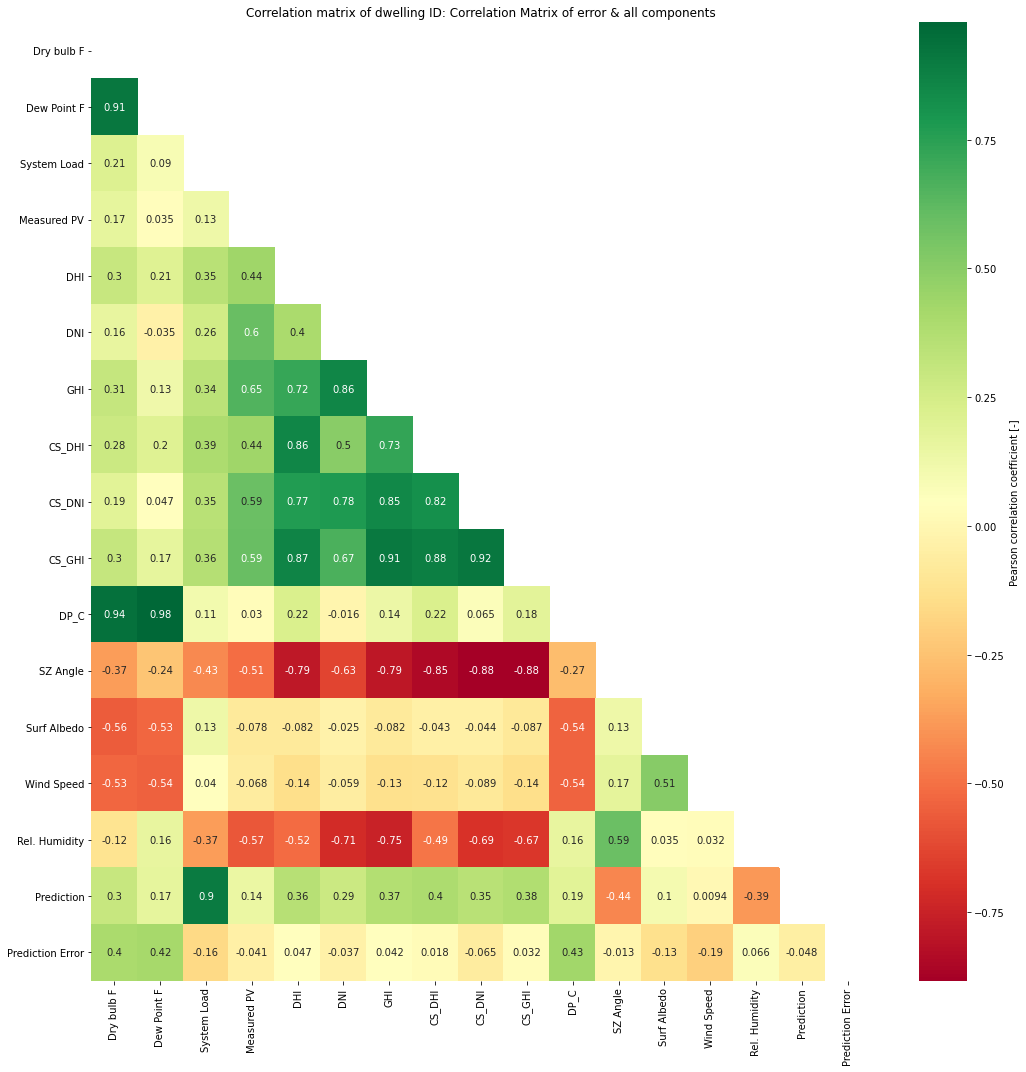

In [22]:
fig = create_corr_matrix(norm_df, 'Correlation Matrix of error & all components', True, size=(15,15))

### Error Learning Model

In [23]:
norm_df = np.array(norm_df)
Xe, Ye = create_dataset(norm_df, 24)
print(Xe.shape)

(55145, 24, 17)


In [24]:
trXe = Xe[:50000, :, :]
vaXe = Xe[50000:, :, :]
trYe = Ye[:50000, 16]
vaYe = Ye[50000:,16]

print(trXe.shape)
print(trYe.shape)
print(vaXe.shape)

(50000, 24, 17)
(50000,)
(5145, 24, 17)


In [25]:
visible1e = Input(shape=(24, 17))    # 타임스텝 100, 피처 25, 21+4 

# visible2 = Input(shape=(sequence_length, nb_features))    # 타임스텝 100, 피처 25, 21+4 

d1 = Conv1D(filters=512, kernel_size=2, padding='causal', activation='relu',  
            dilation_rate=1)(visible1e)  # 2x1=2,  x4  

d1 = Conv1D(filters=17, kernel_size=2, padding='causal', activation='relu',  
            dilation_rate=4)(d1)        # 2x4=8,  x4   

res01 = keras.layers.Add()([d1, visible1e])   # (100, 25) (100, 25)
# ===== 2L 

d1 = Conv1D(filters=512, kernel_size=2, padding='causal', activation='relu',  
            dilation_rate=16)(res01)     # 2x16=32,  x4  

d1 = Conv1D(filters=17, kernel_size=4, padding='causal', activation='relu',  
            dilation_rate=32)(d1)        # 4x32= 128 

res02 = keras.layers.Add()([d1, res01])   # (100, 25) (100, 25)
# ===== 4L 

d1 = Conv1D(filters=512, kernel_size=4, padding='causal', activation='relu',  
            dilation_rate=16)(res02)    # 4x16= 64    ####### shrink layer

d1 = Conv1D(filters=17, kernel_size=8, padding='causal', activation='relu',  
            dilation_rate=4)(d1)        # 8x4= 32     ####### shrink layer

res03 = keras.layers.Add()([d1, res02])   # (100, 25) (100, 25)  # res03 --------------------------
# ===== 6L 

# below 4Layers 
#------------------------------------------------------

#out = Conv1D(1024, 1, padding='same', activation='elu')(res03)   # --------------------  
oute = Conv1D(512, 1, padding='same', activation='relu')(res03)   # --------------------  
oute = Dropout(0.2)(oute)   

#out = Conv1D(512, 1, padding='same', activation='elu')(out) # 1 is 1x1 conv, same is normal conv.  
oute = Conv1D(256, 1, padding='same', activation='relu')(oute) # 1 is 1x1 conv, same is normal conv.  
oute = Dropout(0.2)(oute)  

#out = AveragePooling1D(pool_size=2, strides=2, padding='same')(out) # pool_size=2, strides=1
oute = GlobalAveragePooling1D()(oute) # pool_size=2, strides=1
# GlobalAveragePooling1D, GlobalMaxPooling1D  > AveragePooling1D, MaxPooling1D

oute = Dense(1)(oute) # Dense(1, ), nb_out = 1, # 마지막 아웃 풋에 액티베이션 펑션을 제거. 

# https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf
# ---------------------------------------------------------------------

#model = Model(inputs=visible1, outputs=[out]) # from keras.models import Model
#model = Model(inputs=[visible1, visible2], outputs=[out]) # from keras.models import Model

model2 = Model(inputs=[visible1e], outputs=[oute]) # from keras.models import Model

In [26]:
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape'])
early_stopping =EarlyStopping(monitor='val_loss', patience=100)  # 10 -> 20 -> 4
batch_size = 100
epochs = 1000

history = LossHistory()
history.init()

model2.fit(trXe, trYe, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaXe, vaYe), callbacks=[history, early_stopping])  # , checkpoint

Train on 50000 samples, validate on 5145 samples
Epoch 1/1000
50000/50000 [==============================] - 6s 118us/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0212 - mape: 393.1090 - val_loss: 0.0010 - val_mse: 0.0010 - val_mae: 0.0270 - val_mape: 96.0594
Epoch 2/1000
50000/50000 [==============================] - 5s 96us/step - loss: 3.4963e-04 - mse: 3.4963e-04 - mae: 0.0144 - mape: 312.9453 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0304 - val_mape: 105.6847
Epoch 3/1000
50000/50000 [==============================] - 5s 96us/step - loss: 4.1908e-04 - mse: 4.1908e-04 - mae: 0.0159 - mape: 297.9425 - val_loss: 0.0010 - val_mse: 0.0010 - val_mae: 0.0271 - val_mape: 94.0297
Epoch 4/1000
50000/50000 [==============================] - 5s 96us/step - loss: 4.6418e-04 - mse: 4.6417e-04 - mae: 0.0168 - mape: 402.4745 - val_loss: 0.0010 - val_mse: 0.0010 - val_mae: 0.0270 - val_mape: 91.0210
Epoch 5/1000
50000/50000 [==============================] - 5s 96us/step - loss: 4.4456e-04 -

In [27]:
testPredict = model.predict(teX, batch_size=batch_size)
teY = teY.reshape(-1,1)
print(testPredict.shape)
tePe = testPredict - teY

print(tePe.shape)

np.savetxt('NetLoad_testPrediction.txt', testPredict)
np.savetxt('NetLoad_testY.txt', teY)
np.savetxt('NetLoad_testPredictionError.txt', tePe)

(23645, 1)
(23645, 1)


In [28]:
min_max_scaler = preprocessing.MinMaxScaler()
norm_df = pd.DataFrame(min_max_scaler.fit_transform(df), 
                             columns=df.columns, 
                             index=df.index)
norm_df.head()

,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity
0,0.423423,0.54,0.218118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.998572,0.994825,0.05,1.0
1,0.423423,0.54,0.185768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.955240,0.994825,0.05,1.0
2,0.414414,0.54,0.162604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.887636,0.994825,0.05,1.0
3,0.414414,0.55,0.149937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.811215,0.994825,0.05,1.0
4,0.423423,0.56,0.148120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.732332,0.994825,0.05,1.0


In [29]:
norm_df = norm_df.iloc[55195:,:]
norm_df.head()

,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity
55195,0.585586,0.70,0.299268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.660550,0.556789,0.023286,0.05,0.984424
55196,0.576577,0.70,0.299571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642202,0.625321,0.023286,0.05,0.996524
55197,0.558559,0.69,0.257381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642202,0.683966,0.023286,0.05,0.978117
55198,0.549550,0.68,0.199092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642202,0.727941,0.023286,0.05,1.000000
55199,0.540541,0.68,0.143578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642202,0.751820,0.023286,0.05,1.000000


In [30]:
norm_df = np.array(norm_df)
print(norm_df.shape)

norm_df = np.hstack([norm_df, testPredict, tePe])

print(norm_df.shape)

(23645, 15)
(23645, 17)


In [31]:
teXe, teYe = create_dataset(norm_df, 24)
errorPredict =  model2.predict(teXe, batch_size=batch_size)

np.savetxt('NetLoad_ErrorPrediction.txt', errorPredict)

In [40]:
finalPredict = np.subtract(testPredict[25:,:], errorPredict)

np.savetxt('NetLoad_FinalPrediction.txt', finalPredict)

print('Test Score > MSE == ', mean_squared_error(teY, testPredict), ' MAE == ', mean_absolute_error(teY, testPredict), 'MAPE == ', mean_absolute_percentage_error(teY, testPredict))
print('Test Score > MSE == ', mean_squared_error(teY[25:,:], finalPredict), ' MAE == ', mean_absolute_error(teY[25:,:], finalPredict), 'MAPE == ', mean_absolute_percentage_error(teY[25:,:], finalPredict))

Test Score > MSE ==  0.0014560894181897125  MAE ==  0.030414567169989686 MAPE ==  11.658093464359428
Test Score > MSE ==  0.00046919461379723855  MAE ==  0.01503139910754408 MAPE ==  5.9564327017975245


In [41]:
print(teY.shape)
print(testPredict.shape)
print(errorPredict.shape)
print(finalPredict.shape)

(23645, 1)
(23645, 1)
(23620, 1)
(23620, 1)


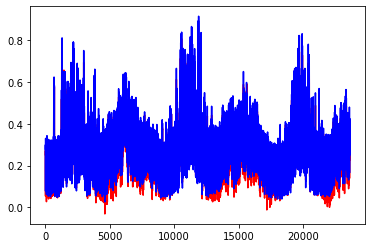

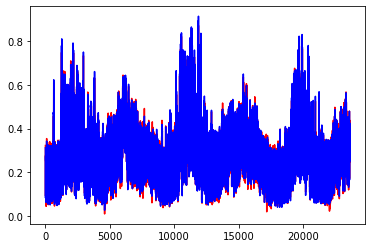

In [42]:
testPredict = testPredict.reshape([-1,1])
errorPredict = errorPredict.reshape([-1,1])
finalPredict = finalPredict.reshape([-1,1])
testY = teY.reshape([-1,1])

plt.figure(1)
plt.plot(testPredict, 'r')
plt.plot(testY, 'b')
plt.show()

plt.figure(2)
plt.plot(finalPredict, 'r')
plt.plot(testY[25:], 'b')
plt.show()